We've two datasets from two different sources to clean

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

%matplotlib inline

# Dataset - I

In [57]:
train_data = pd.read_csv('data/raw/train.csv')
test_data = pd.read_csv('data/raw/test.csv')

In [58]:
train_data.shape

(1790, 2)

In [59]:
train_data.head()

,text,label
0,that Rutgers game was an abomination. An affro...,anger
1,I get mad over something so minuscule I try to...,anger
2,I get mad over something so minuscule I try to...,anger
3,eyes have been dilated. I hate the world right...,anger
4,One chosen by the CLP members! MP seats are no...,anger


## Data cleaning

In [60]:
from emo_unicode import EMOTICONS

In [61]:
def removeLinks(text):
    text = re.sub(r'http\S+', '', text, flags=re.MULTILINE)
    return text

def removeHTMLTags(text):
    text = re.sub(r'<.*?>', '', text, flags=re.MULTILINE)
    return text

def convertToLowerCase(text):
    return text.lower()

def removeWordsWithNumbers(text):
    return re.sub(r'\S*\d\S*', '', text).strip()

def removePuctuations(text):
    return re.sub(r'[^A-Za-z0-9]+', ' ', text)

def removeWhiteSpaces(text):
    return text.strip()

def decontracted(phrase):
    
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase


def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

def remove_emoticons(text):
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
    return emoticon_pattern.sub(r'', text)

In [62]:
def clean_data(text):
    
    text = str(text)
    text = removeLinks(text)
    text = removeHTMLTags(text)
    text = convertToLowerCase(text)
    text = removeWordsWithNumbers(text)
    text = removeWhiteSpaces(text)
    text = decontracted(text)
    text = removePuctuations(text)
    text = remove_emoji(text)
    text = remove_emoticons(text)
    text = text.strip()
    
    return text

In [63]:
cleaned_train_data = train_data.dropna(how='any', axis=0)
cleaned_train_data.shape

(1790, 2)

In [64]:
cleaned_train_data['text'] = cleaned_train_data['text'].apply(clean_data)

In [65]:
cleaned_train_data.shape

(1790, 2)

In [66]:
train_data['text'].iloc[0]

'that Rutgers game was an abomination. An affront to God and man. We must never speak of it again.'

In [67]:
cleaned_train_data['text'].iloc[0]

'that rutgers game was an abomination an affront to god and man we must never speak of it again'

In [68]:
cleaned_test_data = test_data.dropna(how='any', axis=0)
cleaned_test_data['text'] = cleaned_test_data['text'].apply(clean_data)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [69]:
cleaned_test_data['text'].iloc[0]

'afraid of the quiet ones they are the ones who actually think'

## EDA

In [70]:
cleaned_train_data['label'].value_counts()

fear       569
joy        416
anger      409
sadness    396
Name: label, dtype: int64

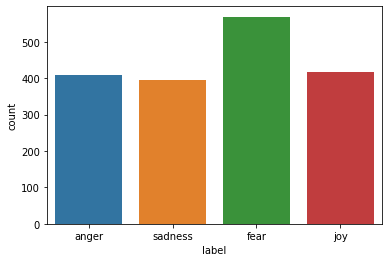

In [71]:
sns.countplot(x='label', data=cleaned_train_data)

In [72]:
cleaned_test_data['label'].value_counts()

fear       471
joy        356
anger      348
sadness    327
Name: label, dtype: int64

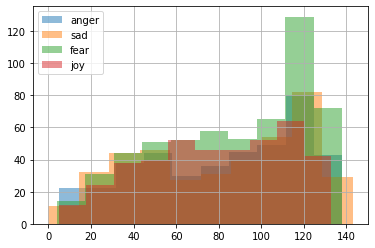

In [73]:
cleaned_train_data.loc[cleaned_train_data['label'] == 'anger', 'text'].str.len().hist(label='anger', alpha=.5)
cleaned_train_data.loc[cleaned_train_data['label'] == 'sadness', 'text'].str.len().hist(label='sad', alpha=.5)
cleaned_train_data.loc[cleaned_train_data['label'] == 'fear', 'text'].str.len().hist(label='fear', alpha=.5)
cleaned_train_data.loc[cleaned_train_data['label'] == 'joy', 'text'].str.len().hist(label='joy', alpha=.5)
plt.legend()

In [74]:
cleaned_train_data.to_csv('data/clean/clean_train.csv', index=None)
cleaned_test_data.to_csv('data/clean/clean_test.csv', index=None)

# Dataset - II

In [26]:
data = pd.read_csv('data/raw/kaggle_emotion_data.csv')

In [27]:
data.shape

(416809, 2)

In [28]:
data.head()

,text,emotions
0,i feel awful about it too because it s my job ...,sadness
1,im alone i feel awful,sadness
2,ive probably mentioned this before but i reall...,joy
3,i was feeling a little low few days back,sadness
4,i beleive that i am much more sensitive to oth...,love


## Data Cleaning

In [29]:
cleaned_data = data.dropna(how='any', axis=0)
cleaned_data.shape

(416809, 2)

In [30]:
cleaned_data['text'] = cleaned_data['text'].apply(clean_data)

In [31]:
cleaned_data.shape

(416809, 2)

In [32]:
data['text'].iloc[0]

'i feel awful about it too because it s my job to get him in a position to succeed and it just didn t happen here'

In [33]:
cleaned_data['text'].iloc[0]

'i feel awful about it too because it s my job to get him in a position to succeed and it just didn t happen here'

## EDA

In [34]:
cleaned_data['emotions'].value_counts()

joy         141067
sadness     121187
anger        57317
fear         47712
love         34554
surprise     14972
Name: emotions, dtype: int64

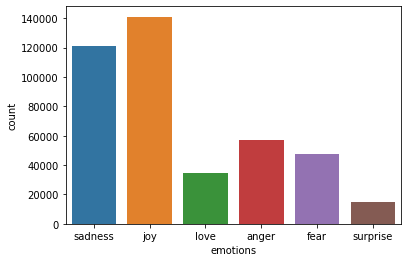

In [35]:
sns.countplot(x='emotions', data=cleaned_data)

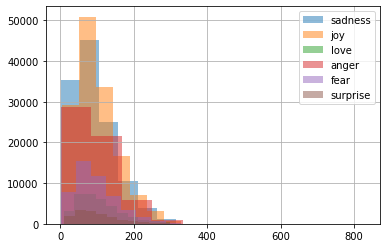

In [36]:
cleaned_data.loc[cleaned_data['emotions'] == 'sadness', 'text'].str.len().hist(label='sadness', alpha=.5)
cleaned_data.loc[cleaned_data['emotions'] == 'joy', 'text'].str.len().hist(label='joy', alpha=.5)
cleaned_data.loc[cleaned_data['emotions'] == 'love', 'text'].str.len().hist(label='love', alpha=.5)
cleaned_data.loc[cleaned_data['emotions'] == 'anger', 'text'].str.len().hist(label='anger', alpha=.5)
cleaned_data.loc[cleaned_data['emotions'] == 'fear', 'text'].str.len().hist(label='fear', alpha=.5)
cleaned_data.loc[cleaned_data['emotions'] == 'surprise', 'text'].str.len().hist(label='surprise', alpha=.5)
plt.legend()

In [56]:
cleaned_data.to_csv('data/clean/cleaned_data_kaggle.csv', index=None)